In [6]:
from services.instance_generation import *
from services.mvbin import *
from services.models import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxpy as cp

Text(0.5, 1.0, 'Sample Correlation Matrix')

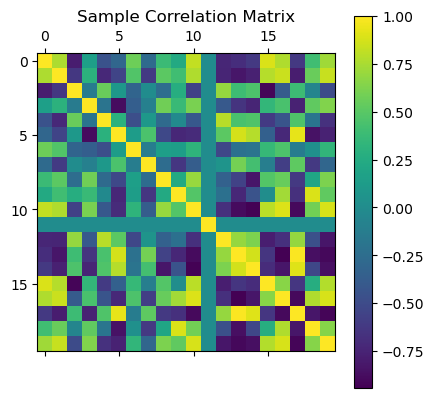

In [7]:
n = 20
M = 30 # number of instances
beta_param = 1
upper_bound_vol = 20/(3.46*100)
lower_bound_vol = 5/(3.46*100)

upper_bound_mean = 8/(12*100)
lower_bound_mean = 4/(12*100)

lower_bound_prob = 0.
upper_bound_prob = 1

corr_1 = vineBeta(n, beta_param)
plt.matshow(corr_1);
plt.colorbar();
plt.title("Sample Correlation Matrix")

In [8]:
std_devs = generate_uniform_random_vector(lower_bound_vol, upper_bound_vol, n)
covariance_1 = correlation_to_covariance(std_devs, corr_1)
means = generate_uniform_random_vector(lower_bound_mean, upper_bound_mean, n)
probabilities = generate_uniform_random_vector(0, upper_bound_prob, n)

In [9]:
x = sample_from_multivariate_normal(means, covariance_1, M)
jp = generate_joint_probabilities(probabilities)
y  = mvbin(np.diag(jp), joint_prob=jp, size=M)
y = 2*y - 1

[ 2.78291642e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.39145821e-16  0.00000000e+00
  2.78291642e-16 -2.78291642e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.78291642e-16  0.00000000e+00 -4.17437464e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.78291642e-16]
[[ 1.         -0.98998242 -0.99060859 -0.97589268 -0.96704053 -0.96666217
  -0.96294187 -0.98109796 -0.96843533 -0.98788189 -0.96728488 -0.97772775
  -0.99133058 -0.99175908 -0.96711816 -0.98445585 -0.98037616 -0.97060834
  -0.95659484 -0.96186617]
 [-0.98998242  1.         -0.98602073 -0.97215807 -0.98625126 -0.97923469
  -0.96743998 -0.95817658 -0.9692753  -0.97217539 -0.96658991 -0.95590397
  -0.97372084 -0.9720249  -0.96639059 -0.97199446 -0.98487693 -0.96945543
  -0.97075121 -0.9950629 ]
 [-0.99060859 -0.98602073  1.         -0.97161978 -0.97383341 -0.96931908
  -0.95623702 -0.97061395 -0.97564644 -0.97398754 -0.98857753 -0.97941717
  -0.97264984 -0.98435062 -0

C:\Users\david\anaconda3\envs\e2esp\lib\site-packages\scipy\stats\_multivariate.py:657: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


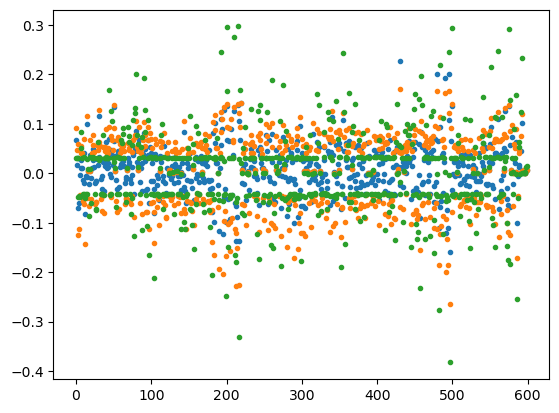

In [10]:
# plt.hist(x.flatten(), alpha = 0.4);
# plt.hist(generate_mu1(x).flatten(), alpha = 0.1);
def generate_mu1(x, beta0 = 1,  beta1 = -2, beta2 = 0.04, beta3 = 0.03):
    return beta0*x + beta1*(x-0.02)**2 - beta2*((x < -0.0).astype(float)) + beta3*((x > 0.12/12).astype(float))

plt.plot(x.flatten(), '.');
plt.plot(generate_mu1(x).flatten(), '.');
mu1 = generate_mu1(x)

def generate_mu2_scenarios(x, mu1, y, impact = 1):
    return (1 + x)*mu1 + impact*x*y

plt.plot(generate_mu2_scenarios(x, mu1, y).flatten(), '.');
mu2 = generate_mu2_scenarios(x, mu1, y)

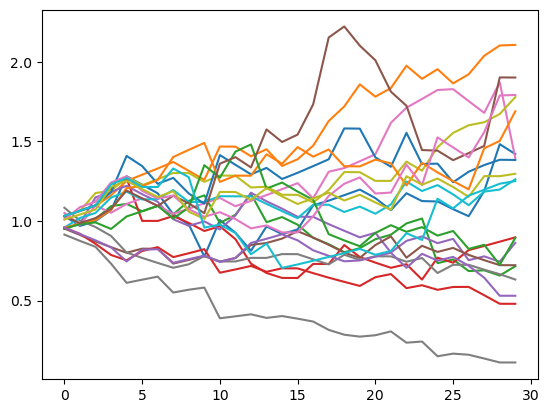

In [11]:
plt.plot((1 +mu2).cumprod(axis = 0));

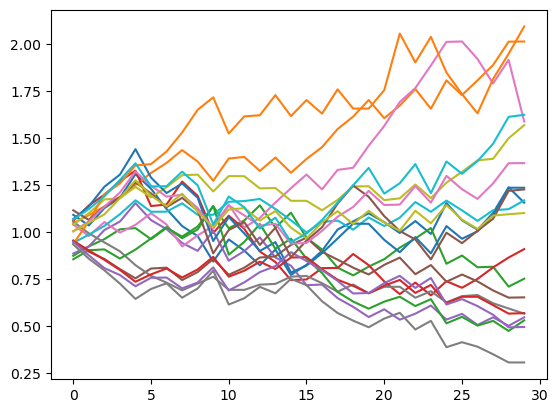

In [12]:
plt.plot((1 + mu1).cumprod(axis = 0));

In [13]:
y_scenarios = mvbin(np.diag(jp), joint_prob=jp, size=M)
y_scenarios = 2*y_scenarios - 1

[ 2.78291642e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.39145821e-16  0.00000000e+00
  2.78291642e-16 -2.78291642e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.78291642e-16  0.00000000e+00 -4.17437464e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.78291642e-16]
[[ 1.         -0.98998242 -0.99060859 -0.97589268 -0.96704053 -0.96666217
  -0.96294187 -0.98109796 -0.96843533 -0.98788189 -0.96728488 -0.97772775
  -0.99133058 -0.99175908 -0.96711816 -0.98445585 -0.98037616 -0.97060834
  -0.95659484 -0.96186617]
 [-0.98998242  1.         -0.98602073 -0.97215807 -0.98625126 -0.97923469
  -0.96743998 -0.95817658 -0.9692753  -0.97217539 -0.96658991 -0.95590397
  -0.97372084 -0.9720249  -0.96639059 -0.97199446 -0.98487693 -0.96945543
  -0.97075121 -0.9950629 ]
 [-0.99060859 -0.98602073  1.         -0.97161978 -0.97383341 -0.96931908
  -0.95623702 -0.97061395 -0.97564644 -0.97398754 -0.98857753 -0.97941717
  -0.97264984 -0.98435062 -0

In [14]:
y_bad_scenarios = mvbin(0.5*np.ones(n), rho = np.eye(n), size=M);
y_bad_scenarios = 2 * y_bad_scenarios - 1;

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[ 1.00000000e+00 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16]
 [-1.52655666e-16  1.00000000e+00 -1.52655666e-16 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16]
 [-1.52655666e-16 -1.52655666e-16  1.00000000e+00 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16
  -1.52655666e-16 -1.52655666e-16 -1.52655666e-16 -1.52655666e-16
  -1.5265566

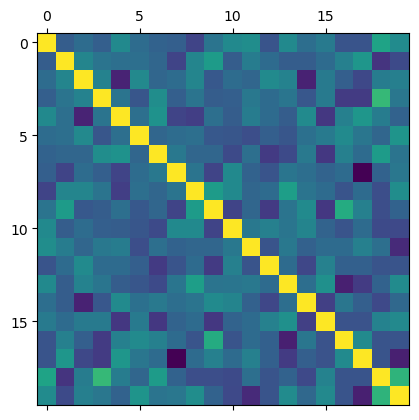

In [15]:
#making sure the covariance is showing as zero corr
plt.matshow(pd.DataFrame(y_bad_scenarios).corr())

In [16]:
single_forecast_mpc(mu1[0,:], mu2[0,:], covariance_1, risk_aversion = 10, transaction_penalty = 0.05)

(                                     0
 Risk and Txn Adjusted Return  0.064172
 Return                        0.123485
 Risk                          0.004313
 Transaction Cost              0.055000,
 array([ 7.26958666e-23,  3.26842930e-23, -5.00000000e-02,  1.68331423e-22,
        -5.00000000e-02, -5.00000000e-02,  1.32600249e-22,  5.50000000e-01,
         1.53108511e-22, -5.00000000e-02,  1.41031063e-22, -5.00000000e-02,
        -5.00000000e-02, -5.00000000e-02, -5.00000000e-02,  1.85018538e-22,
        -5.00000000e-02, -5.00000000e-02, -5.00000000e-02,  3.73672026e-23]),
 array([-6.07962733e-19, -6.07906048e-19, -3.47386199e-19, -6.07963039e-19,
        -3.47350800e-19, -3.47386528e-19, -6.07917261e-19, -6.07867590e-19,
        -6.07913234e-19, -3.47458419e-19, -6.07910761e-19, -3.47426851e-19,
        -3.47381973e-19, -3.47370443e-19, -3.47461512e-19, -6.07920027e-19,
        -3.47419385e-19, -3.47441335e-19, -3.47434861e-19, -6.07944730e-19]),
 array([5.00000000e-02, 5.00000000e

In [17]:
#compute the best possible performance based on perfect information
best_performance = []
for i in range(M):
    df, y_1, y_2, w_1, w_2 = single_forecast_mpc(mu1[i,:], mu2[i,:], covariance_1, risk_aversion = 10, transaction_penalty = 0.05)
    best_performance.append(df.T)
best_performance_df = pd.concat(best_performance, axis =0)

array([0.89229722, 0.00804954, 0.00319411])

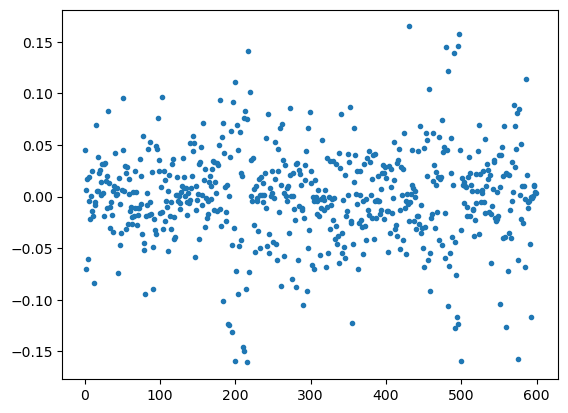

In [18]:
#fit to all the data, at each stage form predictions and optimize based on those predictions, evaluate objective value at each point
simple_estimator = OLS(x.flatten(), mu1.flatten(), mu2.flatten(), y.flatten())
simple_estimator.fit_mu1()
simple_estimator.fit_mu2()

#plt.plot(simple_estimator.predict_mu1(x[0,:]), mu1[0,:], '.')
#plt.plot(simple_estimator.predict_mu2(mu1[0,:], y[0,:]), mu2[0,:], '.')

#plt.plot(simple_estimator.predict_mu1(x.flatten()), mu1.flatten(), '.')

# plt.plot(x.flatten(), simple_estimator.predict_mu1(x.flatten()),'.', label = "Least Square")
# plt.plot(x.flatten(), mu1.flatten(),'.', label = "Actual relationship")
# plt.legend()

plt.plot(simple_estimator.predict_mu2(mu1.flatten(), y.flatten()) - mu2.flatten(), '.')
#plt.plot(simple_estimator.predict_mu2(mu1.flatten(), y.flatten()), mu2.flatten(), '.')
simple_estimator.mu_2_coeffs

In [19]:
def multi_forecast_mpc(pi, mu_1, mu_forecasts, covariance, risk_aversion=10, transaction_penalty=0.05):
    # forecasts will be fed in as a list of vectors
    M = len(pi)  # number of scenarios
    n = len(mu_1)  #

    w_0 = (1 / n) * np.ones(n)  # initial portfolio
    y = cp.Variable(n)
    w = cp.Variable(n)
    y_scenario = cp.Variable((n, M))  # second period variable in scenario
    w_scenario = cp.Variable((n, M))  # second period variable in scenario
    constraints = [cp.sum(w) == 1, w >= 0, y == w - w_0]
    for i in range(M):
        constraints.extend([cp.sum(w_scenario[:, i]) == 1,
                            w_scenario[:, i] >= 0,
                            y_scenario[:, i] == w_scenario[:, i] - w])

    ret_1 = mu_1.T @ w
    risk_1 = risk_aversion * cp.quad_form(w, covariance)
    transaction_cost = transaction_penalty * cp.norm1(y)
    adjusted_returns = ret_1 - (risk_1 + transaction_cost)
    expected_returns = 0

    for i in range(M):
        ret_i = mu_forecasts[i].T @ w_scenario[:, i]
        risk_i = risk_aversion * cp.quad_form(w_scenario[:, i], covariance)
        transaction_cost_i = transaction_penalty * cp.norm1(y_scenario[:, i])
        expected_returns += pi[i] * (ret_i - (risk_i + transaction_cost_i))

    prob = cp.Problem(cp.Maximize(adjusted_returns + expected_returns), constraints)
    prob.solve(verbose = False)

    df = pd.DataFrame((adjusted_returns.value, expected_returns.value),
                      index=['Stage 1 Objective', 'Stage 2 Objective'])
    return df, y.value, w.value  # today information


In [20]:
#evaluate how the two would do
ols_performance = []
for i in range(M):
    x_i = x[i,:]
    predicted_mu1 = simple_estimator.predict_mu1(x_i)
    #generate mu2 using y_bad_scenarios
    mu_forecasts = []
    pi = []
    for scenario in range(M):
        predicted_mu2 = simple_estimator.predict_mu2(predicted_mu1, y_bad_scenarios[scenario,:])
        mu_forecasts.append(predicted_mu2)
        pi.append(1/M)
    df, y_val, w_val = multi_forecast_mpc(pi, predicted_mu1, mu_forecasts, covariance_1)

    df, y_1, y_2, w_1, w_2 = single_forecast_mpc(mu1[i,:], mu2[i,:], covariance_1, risk_aversion = 10, transaction_penalty = 0.05, y_1_val=y_val)
    ols_performance.append(df.T)
ols_performance_df = pd.concat(ols_performance, axis =0)

In [21]:
def single_forecast_mpc(mu_1, mu_2, covariance, risk_aversion=10, transaction_penalty=0.05, y_1_val=None):
    n = len(mu_1)
    w_0 = (1 / n) * np.ones(n)
    y_1 = cp.Variable(n)
    y_2 = cp.Variable(n)
    w_1 = cp.Variable(n)
    w_2 = cp.Variable(n)
    if y_1_val is None:
        constraints = [cp.sum(w_1) == 1, cp.sum(w_2) == 1,
                       w_1 >= 0, w_2 >= 0,
                       y_1 == w_1 - w_0, y_2 == w_2 - w_1]
    else:
        constraints = [cp.sum(w_1) == 1, cp.sum(w_2) == 1,
                       w_1 >= -10**(-4), w_2 >= 0,
                       y_1 == w_1 - w_0, y_2 == w_2 - w_1,
                       y_1 == y_1_val]

    ret_1 = mu_1.T @ w_1
    ret_2 = mu_2.T @ w_2
    risk_1 = risk_aversion * cp.quad_form(w_1, covariance)
    risk_2 = risk_aversion * cp.quad_form(w_2, covariance)
    transaction_cost = transaction_penalty * cp.norm1(y_1) + transaction_penalty * cp.norm1(y_2)
    adjusted_returns = ret_1 + ret_2 - (risk_1 + risk_2 + transaction_cost)
    prob = cp.Problem(cp.Maximize(adjusted_returns), constraints)
    prob.solve(verbose=True)

    df = pd.DataFrame((adjusted_returns.value, ret_1.value + ret_2.value, \
                       risk_1.value + risk_2.value, transaction_cost.value),
                      index=['Risk and Txn Adjusted Return', 'Return', 'Risk', 'Transaction Cost'])
    return df, y_1.value, y_2.value, w_1.value, w_2.value

In [22]:
#evaluate how the two would do
#careful design of the scenarios does not make much sense when the parameterization is incorrect
data_performance = []
for i in range(M):
    x_i = x[i,:]
    predicted_mu1 = mu1[i,:] #simple_estimator.predict_mu1(x_i)
    #generate mu2 using the best scenarios
    mu_forecasts = []
    pi = []
    for scenario in range(M):
        predicted_mu2 =  mu2[scenario,:] #simple_estimator.predict_mu2(predicted_mu1, y_scenarios[scenario,:]) #mu2[scenario,:] #simple_estimator.predict_mu2(predicted_mu1, y_scenarios[scenario,:])
        mu_forecasts.append(predicted_mu2)
        pi.append(1/M)
        #if scenario == i:
        #     pi.append(1.0)
        #else:
        #     pi.append(0.00/M)
    df, y_val, w_val = multi_forecast_mpc(pi, predicted_mu1, mu_forecasts, covariance_1)

    df, y_1, y_2, w_1, w_2 = single_forecast_mpc(mu1[i,:], mu2[i,:], covariance_1, risk_aversion = 10, transaction_penalty = 0.05, y_1_val=y_val)
    data_performance.append(df.T)
data_performance_df = pd.concat(data_performance, axis =0)

                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Jun 15 07:10:09 PM: Your problem has 80 variables, 7 constraints, and 0 parameters.
(CVXPY) Jun 15 07:10:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 15 07:10:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 15 07:10:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 15 07:10:09 PM: Compiling problem (target solver=OSQP).
(CVXPY) Jun 15 07:10:09 PM: Reduction chain: FlipObjective -> CvxAttr2Constr -> Qp2SymbolicQp ->

In [23]:
t = pd.concat([best_performance_df.iloc[:,0],
               data_performance_df.iloc[:,0],
               ols_performance_df.iloc[:,0]], axis = 1)

<AxesSubplot:>

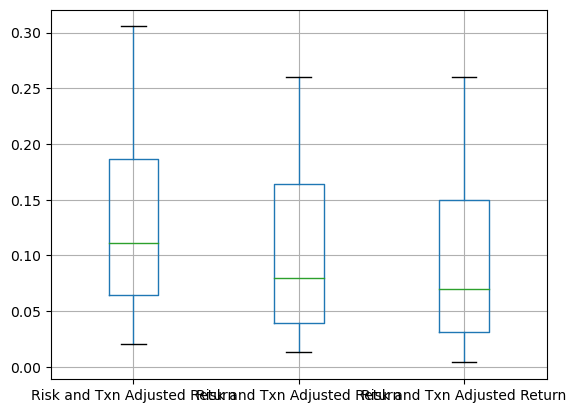

In [24]:
t.boxplot()
#bad

In [25]:
from torch.utils.data import Dataset
import pandas as pd
import torch
from scipy.linalg import sqrtm

class PortfolioDataset(Dataset):

    def __init__(self, x, mu1, mu2):
        # data loading

        self.x = x
        self.mu1 = mu1
        self.mu2 = mu2


    def __getitem__(self, index):

        target = (torch.from_numpy(self.mu1[index,:]), torch.from_numpy(self.mu2[index,:]))
        return (torch.from_numpy(x[index,:])), target

    def __len__(self):
        return len(self.x)


In [26]:
from torch.utils.data import DataLoader
from torch.utils.data import Subset

train_idx = range(M)
#test_idx = range(M//2 , M)

dataset = PortfolioDataset(x, mu1, mu2)
train_dataset = Subset(dataset, train_idx)
#test_dataset = Subset(dataset, test_idx)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
#test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=True)

(inputs, target) = next(iter(train_dataloader)) # train_dataset[0]
target

[tensor([[ 0.0922,  0.0476, -0.1257,  0.0600, -0.1136, -0.0444,  0.0401,  0.0558,
           0.0402, -0.0568,  0.0695, -0.0627, -0.1440, -0.0465, -0.0502,  0.1162,
           0.0046, -0.0653,  0.0045,  0.0670],
         [-0.0430, -0.0567,  0.0486, -0.1052,  0.0750,  0.0660,  0.0718,  0.0509,
          -0.0593, -0.0421, -0.0817,  0.0593,  0.0633,  0.0603,  0.0776, -0.0866,
          -0.0617,  0.0933, -0.0558, -0.1017]], dtype=torch.float64),
 tensor([[ 0.0318,  0.0308, -0.0473,  0.0316, -0.0461, -0.0475,  0.0507,  0.0832,
           0.0302, -0.0415,  0.0320, -0.0419, -0.0492, -0.0410, -0.0412,  0.0291,
           0.0096, -0.0856,  0.0095,  0.0319],
         [-0.0449, -0.0415,  0.0681, -0.0453,  0.0321,  0.1049,  0.0320,  0.0311,
          -0.0417, -0.0409, -0.1143,  0.0316,  0.0991,  0.0927,  0.0321, -0.0437,
          -0.0792,  0.0317, -0.0415, -0.0450]], dtype=torch.float64)]

In [83]:
#end to end approach, pick the regression model so that we achieve good performance
from cvxpylayers.torch import CvxpyLayer
import torch.nn as nn
import torch.nn.functional as f
import torch


def end_of_loop_mpc_layer(w_0, covariance, risk_aversion=10, transaction_penalty=0.05):
    """
    convex optimization layer for portfolio optimization
    """

    n = len(w_0)
    y_1 = cp.Parameter(n) #first stage decision is fed into optimizer

    mu_1 = cp.Parameter(n)
    mu_2 = cp.Parameter(n)
    covariance_sqrt = torch.from_numpy(sqrtm(covariance))

    y_2 = cp.Variable(n)
    w_1 = cp.Variable(n)
    w_2 = cp.Variable(n)

    constraints = [cp.sum(w_1) == 1, cp.sum(w_2) == 1,
                   w_1 >= 0, w_2 >= 0,
                   y_1 == w_1 - w_0, y_2 == w_2 - w_1]

    ret_1 = mu_1.T @ w_1
    ret_2 = mu_2.T @ w_2


    risk_1 = risk_aversion * cp.norm(covariance_sqrt @ w_1, 2)
    risk_2 = risk_aversion * cp.norm(covariance_sqrt @ w_2, 2)

    transaction_cost = transaction_penalty * cp.norm1(y_1) + transaction_penalty * cp.norm1(y_2)
    adjusted_returns = ret_1 + ret_2 - (risk_1 + risk_2 + transaction_cost)
    prob = cp.Problem(cp.Maximize(adjusted_returns), constraints)

    return CvxpyLayer(prob, [y_1, mu_1, mu_2], [w_1, y_2, w_2])
    # the parameters below will be tensors

#evaluate stochastic optimization end to end via linear model and incorrect scenario specification


def multi_forecast_mpc_layer(w_0, M, covariance, risk_aversion=10, transaction_penalty=0.05):
    """
    convex optimization layer for portfolio optimization
    """

    n = len(w_0)
   # forecasts will be fed in as a list of vectors
      # number of scenarios
    y = cp.Variable(n)
    w = cp.Variable(n)
    mu_1 = cp.Parameter(n)
    covariance_sqrt = torch.from_numpy(sqrtm(covariance))
    mu_forecasts = cp.Parameter((M,n))


    y_scenario = cp.Variable((n, M))  # second period variable in scenario
    w_scenario = cp.Variable((n, M))  # second period variable in scenario
    constraints = [cp.sum(w) == 1, w >= 0, y == w - w_0]
    for i in range(M):
        constraints.extend([cp.sum(w_scenario[:, i]) == 1,
                            w_scenario[:, i] >= 0,
                            y_scenario[:, i] == w_scenario[:, i] - w])

    ret_1 = mu_1.T @ w
    risk_1 = risk_aversion * cp.norm(covariance_sqrt @ w, 2)
    transaction_cost = transaction_penalty * cp.norm1(y)
    adjusted_returns = ret_1 - risk_1 - transaction_cost
    expected_returns = 0

    for i in range(M):
        ret_i = mu_forecasts[i].T @ w_scenario[:, i]
        risk_i = risk_aversion * cp.norm(covariance_sqrt @ w_scenario[:, i], 2)
        transaction_cost_i = transaction_penalty * cp.norm1(y_scenario[:, i])
        expected_returns += (1/M)*ret_i - (1/M)*risk_i - (1/M)*transaction_cost_i

    prob = cp.Problem(cp.Maximize(adjusted_returns + expected_returns), constraints)

    return CvxpyLayer(prob, [mu_1, mu_forecasts], [y])
    # the parameters below will be tensors

In [84]:
class mu1_layer(nn.Module): #simple model
    """
    $\mu = 1 + \beta_1*\sigmoid(\beta_2 ||x - w||_1 +\beta_3)$
    """

    def __init__(self):
        super().__init__()
        self.beta0 = nn.Parameter(torch.tensor(1, dtype=torch.float64))
        self.beta1 = nn.Parameter(torch.tensor(1, dtype=torch.float64))

    def forward(self, x):
        mu1 = self.beta0 + self.beta1*x
        return mu1

class mu2_layer(nn.Module): #simple model
    """
    $\mu = 1 + \beta_1*\sigmoid(\beta_2 ||x - w||_1 +\beta_3)$
    """

    def __init__(self):
        super().__init__()
        self.beta0 = nn.Parameter(torch.tensor(0, dtype=torch.float64))
        self.beta1 = nn.Parameter(torch.tensor(1, dtype=torch.float64))
        self.beta2 = nn.Parameter(torch.tensor(0.5, dtype=torch.float64))

    def forward(self, mu1, y):
        batch = mu1.size()[0]
        M = y.size()[0]
        y = y.T
        y = y[None, :, :]
        y = y.repeat(batch, 1, 1)
        mu1 = mu1[:,:, None]
        mu1 = mu1.repeat(1,1,M)

        mu2 = self.beta0 + self.beta1*mu1 + self.beta2*y
        return mu2

In [85]:
def loss_fn(target, input, covariance_sqrt, risk_aversion=10, transaction_penalty=0.05):
    mu1_true, mu2_true = target
    y, w_1, y_2, w_2 = input
    """batched loss function for training the network"""
    # kl_loss = nn.KLDivLoss(reduction = 'batchmean')
    # loss = kl_loss(x_padm, x_exact)
    batch = w_1.size()[0]
    mu1_transpose = torch.permute(mu1_true[:,:,None], (0, 2, 1))
    mu2_transpose = torch.permute(mu2_true[:,:,None], (0, 2, 1))

    ret_1 = torch.squeeze(torch.bmm(mu1_transpose,  w_1[:,:,None]))
    ret_2 = torch.squeeze(torch.bmm(mu2_transpose,  w_2[:,:,None]))

    #take care of batching
    covariance_sqrt = covariance_sqrt[None, :,:]

    covariance_sqrt = covariance_sqrt.repeat(batch, 1, 1)
    sqrt_risk1 = torch.squeeze(torch.bmm(covariance_sqrt , w_1[:,:,None]))
    sqrt_risk2 = torch.squeeze(torch.bmm(covariance_sqrt ,w_2[:,:,None]))

    risk_1 = risk_aversion * torch.norm(sqrt_risk1, p=2, dim = -1)
    risk_2 = risk_aversion * torch.norm(sqrt_risk2, p=2, dim = -1)

    transaction_cost = transaction_penalty * (torch.norm(y, p = 1, dim = -1) + torch.norm(y_2, p = 1 , dim = -1))

    adjusted_returns = ret_1 + ret_2 - (risk_1 + risk_2 + transaction_cost)

    loss = -1*torch.mean(adjusted_returns)
    return loss

In [96]:
class E2E(nn.Module):
    """
    This object implements the network with a step added
    this network updates penalties only with the current iterates
    information
    """

    def __init__(self, mu1_layer, mu2_layer, optimization_layer, final_optimization_layer, loss_function, y_bad_scenarios, covariance):
        super(E2E, self).__init__()
        self.epochs = 100
        self.lr = 1e-2
        self.mu1_layer = mu1_layer
        self.mu2_layer = mu2_layer
        self.optimization_layer = optimization_layer
        self.final_optimization_layer = final_optimization_layer
        self.perf_loss = loss_function
        #all this stuff could be made end to end
        self.y_bad_scenarios = y_bad_scenarios
        self.M =  y_bad_scenarios.size()[0]
        self.covariance_sqrt = torch.from_numpy(sqrtm(covariance))

    def forward(self, inputs):
        x = inputs #is batched
        batches = x.size()[0]
        mu_1_tch = self.mu1_layer(x)

        mu_forecasts = self.mu2_layer(mu_1_tch, self.y_bad_scenarios)
        mu_forecasts = torch.permute(mu_forecasts, (0, 2, 1))
        y_1 = self.optimization_layer(mu_1_tch, mu_forecasts)
        return y_1[0]

    # -----------------------------------------------------------------------------------------------
    # net_train: Train the e2e neural net
    # -----------------------------------------------------------------------------------------------
    def net_train(self, train_set, val_set=None, epochs=None, lr=None, store_solns=False,
                  writer = None, scheduler_tuple = None, optimizer_fn = None):
        """Neural net training module

        Inputs
        train_set: SlidingWindow object containing features x, realizations y and performance
        realizations y_perf
        val_set: SlidingWindow object containing features x, realizations y and performance
        realizations y_perf
        epochs: Number of training epochs
        lr: learning rate
        Output
        Trained model
        (Optional) val_loss: Validation loss
        """
        # Assign number of epochs and learning rate
        if epochs is None:
            epochs = self.epochs
        if lr is None:
            lr = self.lr
        if optimizer_fn is None:
            optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        else:
            optimizer = optimizer_fn(self.parameters(), lr=lr)

        if scheduler_tuple is not None:
            scheduler_function, scheduler_args = scheduler_tuple
            scheduler_args['optimizer'] = optimizer
            scheduler = scheduler_function(**scheduler_args)

        # Define the optimizer and its parameters

        # Number of elements in training set
        n_train = len(train_set)
        # a_hat for each iteration
        solns = []
        # Train the neural network
        for epoch in range(epochs):

            # TRAINING: forward + backward pass
            train_loss = 0
            optimizer.zero_grad()

            for t, (inputs, target) in enumerate(train_set):
                y = self(inputs)

                if store_solns:
                    solns.append(y)
                # Loss function
                mu1_true, mu2_true = target


                w_1, y_2, w_2 = self.final_optimization_layer(y, mu1_true, mu2_true)



                loss = self.perf_loss(target, (y, w_1, y_2, w_2), self.covariance_sqrt)
                loss.backward()
                optimizer.step()

                if scheduler_tuple is not None:
                    if scheduler_function == torch.optim.lr_scheduler.CosineAnnealingWarmRestarts:
                        scheduler.step(epoch + t / n_train)
                # Accumulate loss of the fully trained model
                train_loss += loss.item()

            #all models will have this
            print(train_loss)
            writer.add_scalar('loss', train_loss, epoch)

            for name, param in self.mu1_layer.named_parameters():
                if "beta" in name:
                    writer.add_scalar("beta/"+name, param.item(), epoch)
                    if param.grad is not None:
                        writer.add_scalar("grads/"+name, param.grad.norm().item(), epoch)

            val_loss = 0
            # Compute and return the validation loss of the model
            if val_set is not None:

                # Number of elements in validation set
                n_val = len(val_set)

                with torch.no_grad():
                    for t, (inputs, target) in enumerate(val_set):
                        # Forward pass: predict and optimize
                        y = self(inputs)
                        # Loss function
                        loss = self.perf_loss(target, y)

                        # Accumulate loss
                        val_loss += loss.item()
            #writer.add_scalar("Loss/Validation", val_loss, epoch)
            if epoch%10 == 0:
                print("Epoch ", epoch, " Completed")

        return train_loss, val_loss, solns

In [97]:
#evaluate end to end via custom layer via linear model and incorrect scenarios specification
w0 = (1/n)*torch.ones(n)
end_mpc_layer = end_of_loop_mpc_layer(w0, covariance_1)
mf_mpc_layer = multi_forecast_mpc_layer(w0, M, covariance_1)
mu1_model = mu1_layer()
mu2_model = mu2_layer()

In [98]:
net = E2E(mu1_model, mu2_model, mf_mpc_layer, end_mpc_layer, loss_fn,
          torch.from_numpy(y_bad_scenarios), covariance_1)

In [99]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [100]:
net.net_train(train_dataloader, writer= writer)

torch.Size([2, 20, 30])
torch.Size([2, 20, 30])
torch.Size([2, 20])
torch.Size([2])
torch.Size([2])
torch.Size([2, 20, 30])
torch.Size([2, 20, 30])
torch.Size([2, 20])
torch.Size([2])
torch.Size([2])
torch.Size([2, 20, 30])
torch.Size([2, 20, 30])
torch.Size([2, 20])
torch.Size([2])
torch.Size([2])
torch.Size([2, 20, 30])
torch.Size([2, 20, 30])
torch.Size([2, 20])
torch.Size([2])
torch.Size([2])
torch.Size([2, 20, 30])
torch.Size([2, 20, 30])
torch.Size([2, 20])
torch.Size([2])
torch.Size([2])
torch.Size([2, 20, 30])
torch.Size([2, 20, 30])
torch.Size([2, 20])
torch.Size([2])
torch.Size([2])
torch.Size([2, 20, 30])
torch.Size([2, 20, 30])
torch.Size([2, 20])
torch.Size([2])
torch.Size([2])
torch.Size([2, 20, 30])
torch.Size([2, 20, 30])
torch.Size([2, 20])
torch.Size([2])
torch.Size([2])
torch.Size([2, 20, 30])
torch.Size([2, 20, 30])
torch.Size([2, 20])
torch.Size([2])
torch.Size([2])
torch.Size([2, 20, 30])
torch.Size([2, 20, 30])
torch.Size([2, 20])
torch.Size([2])
torch.Size([2])


KeyboardInterrupt: 